<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-25747-1659972090/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

'Colab Notebooks'/   flowers/           Flowers-Dataset.zip
 flower.h5           Flowers-Dataset/


In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [ ]:
test_data=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_data.flow_from_directory("/content/drive/MyDrive/flowers",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 3334 images belonging to 5 classes.


In [ ]:
x_test=test_data.flow_from_directory("/content/drive/MyDrive/flowers",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 3334 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300,activation ='relu'))

In [ ]:
model.add(Dense(5,activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [ ]:
len(x_train)

139

In [ ]:
model.fit(x_train,epochs=5,validation_data=x_test,steps_per_epoch= len(x_train),validation_steps=len(x_test))

Epoch 1/5
139/139 [==============================] - 525s 4s/step - loss: 1.2061 - accuracy: 0.5420 - val_loss: 0.8945 - val_accuracy: 0.6728
Epoch 2/5
139/139 [==============================] - 75s 539ms/step - loss: 0.8689 - accuracy: 0.6602 - val_loss: 0.7631 - val_accuracy: 0.6977
Epoch 3/5
139/139 [==============================] - 75s 541ms/step - loss: 0.7942 - accuracy: 0.6878 - val_loss: 0.7216 - val_accuracy: 0.7178
Epoch 4/5
139/139 [==============================] - 74s 533ms/step - loss: 0.7542 - accuracy: 0.7133 - val_loss: 0.6758 - val_accuracy: 0.7448
Epoch 5/5
139/139 [==============================] - 76s 546ms/step - loss: 0.7015 - accuracy: 0.7373 - val_loss: 0.7166 - val_accuracy: 0.7223


In [ ]:
model.save("flower.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model=load_model("/content/drive/MyDrive/flower.h5")

In [ ]:
img=image.load_img("/content/drive/MyDrive/flowers/rose/1485142251_ca89254442.jpg",target_size=(64,64))

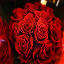

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[ 18.,   8.,   9.],
        [ 17.,   9.,   7.],
        [ 17.,   9.,   7.],
        ...,
        [ 24.,  15.,   6.],
        [ 34.,  20.,  11.],
        [ 13.,  10.,   5.]],

       [[ 19.,   9.,   8.],
        [ 21.,   9.,   9.],
        [ 19.,  11.,   9.],
        ...,
        [ 22.,  16.,   4.],
        [ 37.,  24.,  15.],
        [  9.,   8.,   4.]],

       [[ 21.,  11.,  10.],
        [ 17.,   9.,   7.],
        [ 15.,  10.,   7.],
        ...,
        [ 20.,  13.,   5.],
        [ 34.,  24.,  15.],
        [  6.,   6.,   6.]],

       ...,

       [[ 72.,   6.,   7.],
        [ 55.,   5.,   4.],
        [ 83.,   5.,   5.],
        ...,
        [241.,  42.,  23.],
        [230.,  23.,  13.],
        [251.,  36.,  15.]],

       [[100.,   6.,   7.],
        [ 92.,   8.,   6.],
        [ 74.,   4.,   4.],
        ...,
        [238.,  35.,  18.],
        [239.,  28.,  11.],
        [252.,  42.,  19.]],

       [[115.,   7.,   7.],
        [ 70.,   8.,   9.],
        [ 85.,  

In [ ]:
x.ndim

3

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x.ndim

4

In [ ]:
pred=model.predict(x)

In [ ]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
label=["daisy","dandelion","rose","sunflower","tulip"]

In [ ]:
label[np.argmax(pred)]

'rose'